# Bank Customer Churn Prediction
**Author: Hafiz Fahrurrozi**

Customer churn is a problem for companies, especially if there is a lot churn going. One way to improve the churn situation is to analyze customer behavior based on the collected data. The analysis helps the company to address the problem directly and deliver better service for the customer.

For this project, we will use a public dataset from kaggle (available [here](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers)).

Here we have a customer data from a bank with several details:
1. CreditScore: Credit score of the customer
2. Geography: Country of the customer
3. Gender: Gender of the customer
4. Age: Age of the customer
5. Tenure: Length of tenure (in years)
6. Balance: Amount of balance in the customer's account
7. NumOfProducts: Number of products used by the customer
8. HasCrCard: Credit card ownership
9. IsActiveMember: Whether the customer is an active or dormant member
10. EstimatedSalary: The customer's estimated salary
11. Exited: Churn status of the customer

Using this data, we want to analyze the reason behind customer churn and provide relevant business recommendation.

## Library Imports
We import several libraries we will use in data exploration and analysis such as pandas and numpy. We also load pyplot and seaborn for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Loading
Load the data from the .csv file into pandas DataFrame for our analysis.

In [2]:
raw = pd.read_csv('Churn_Modelling.csv')

## Data Cleaning
Here we take our first look at the data, and check if there is a need to clean them. We check the first 5 entries using head() function.

In [3]:
raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Based on the table above, there are 3 columns without relevant information: RowNumber, CustomerId, and Surname (since we won't do customer profiling). Hence we can drop these columns before doing data exploration.

In [4]:
clean = raw.drop(['RowNumber','CustomerId','Surname'],axis=1)

Next we check for explicit null and missing values from the dataframe. We use info() function to check for explicit null values and show the data types of each columns.

In [5]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


No explicit null values is seen on all columns. We have 10,000 data with 11 variables: 5 continuous data, 5 categorical data, and 1 target column.

## Exploratory Data Analysis
First we will see the statistical description of the data:

In [6]:
clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


From the statistical description, we can see that the customer base is centered in France with 5014 customers. About 70% of the customers have a credit card associated with their account. It's also apparent that most customers have good credit score ranging from 584 to 718, and the score ranges from the lowest (350) to the highest (850) possible. In terms of the customers' age, the bank caters to nearly all age ranging from 18 to 92 years old. The mean age of the customers is 39 years old, and most customer are in the working age (32-44 years old). From product usage we can see that at least 50% of the customers use only one product in their account. Looking at the active member, only half of the registered account in the data are active customers while around 48% are dormant accounts. We can also see that approximately 20% of the customer churned from the bank's services.

### Correlation between variables
While looking at each individual column can tell us about the customer, we can also look at how each variable correlate with each other especially the target column:

<AxesSubplot:>

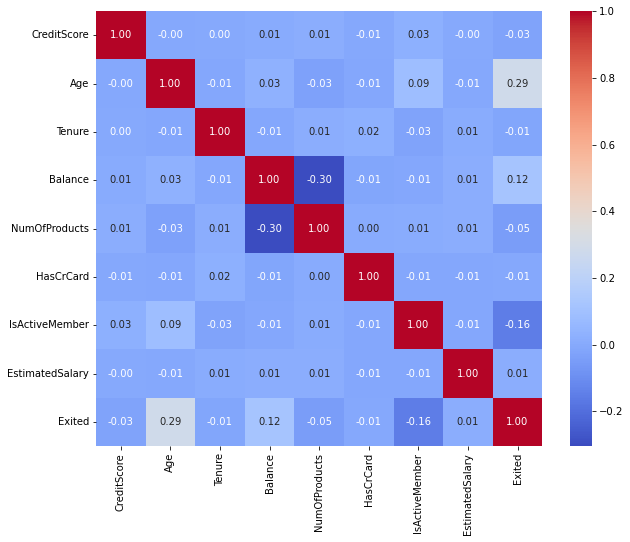

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(clean.corr(),annot=True, fmt='.2f', cmap='coolwarm')

Based on the graph above, NumOfProducts have negative correlation with Balance; Age have positive correlation with Exited; Balance have weak positive correlation with Exited; and IsActiveMember have weak negative correlation with Exited. Based on the score, we cannot conclude that a multicollinearity occured in the data, so we won't drop either Balance or NumOfProducts column.

Studying this graph tells us that slightly older people are churning more than their younger counterpart. We can also say that customers with higher balance in their account are more likely to use smaller number of products.

### Churn distribution
Now we take a closer look at the churn distribution of our customers. Specifically, we'll be looking at the churn distribution in each country:

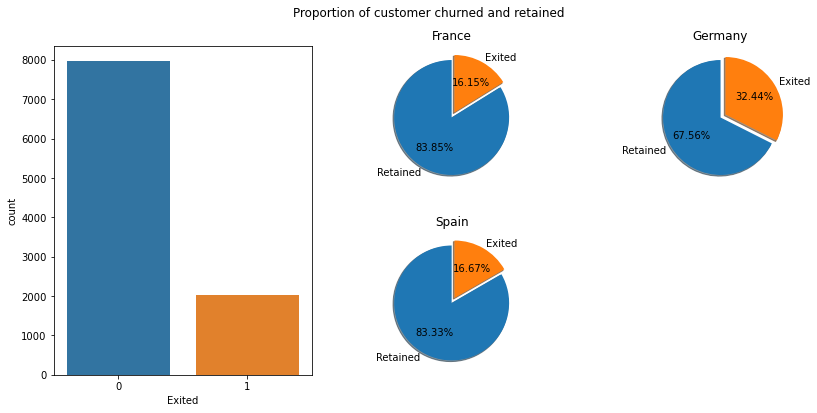

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

In [8]:
# label and data for countries churn pie
labels = 'Retained', 'Exited'
sizes1 = [clean.Exited[(clean['Exited']==0)&(clean['Geography']=='France')].count(), clean.Exited[(clean['Exited']==1)&(clean['Geography']=='France')].count()]
sizes2 = [clean.Exited[(clean['Exited']==0)&(clean['Geography']=='Spain')].count(), clean.Exited[(clean['Exited']==1)&(clean['Geography']=='Spain')].count()]
sizes3 = [clean.Exited[(clean['Exited']==0)&(clean['Geography']=='Germany')].count(), clean.Exited[(clean['Exited']==1)&(clean['Geography']=='Germany')].count()]

# Overall figure
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,3)
explode = (0, 0.1)

# churn plot
ax0 = fig.add_subplot(gs[:-1,0])
sns.countplot(data=clean, x='Exited')

# france pie
ax1 = fig.add_subplot(gs[0,1])
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.set_title("France")

# spain pie
ax2 = fig.add_subplot(gs[1,1])
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax2.set_title("Spain")

# german pie
ax3 = fig.add_subplot(gs[0,2])
ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax3.set_title("Germany")

# Title and printing
fig.suptitle('Proportion of customer churned and retained')
plt.tight_layout()
plt.show()

#statistic count of churn in each country
clean.groupby(['Geography','Exited']).size()

By using pie chart, we can see that Germany has the highest percentage of customer churn. It is also reflected from the table that Germany has the highest count too.

### Customer age distribution
Next up, we will see the distribution of customer's age in each country for each gender. We will also separate the customers by churn.

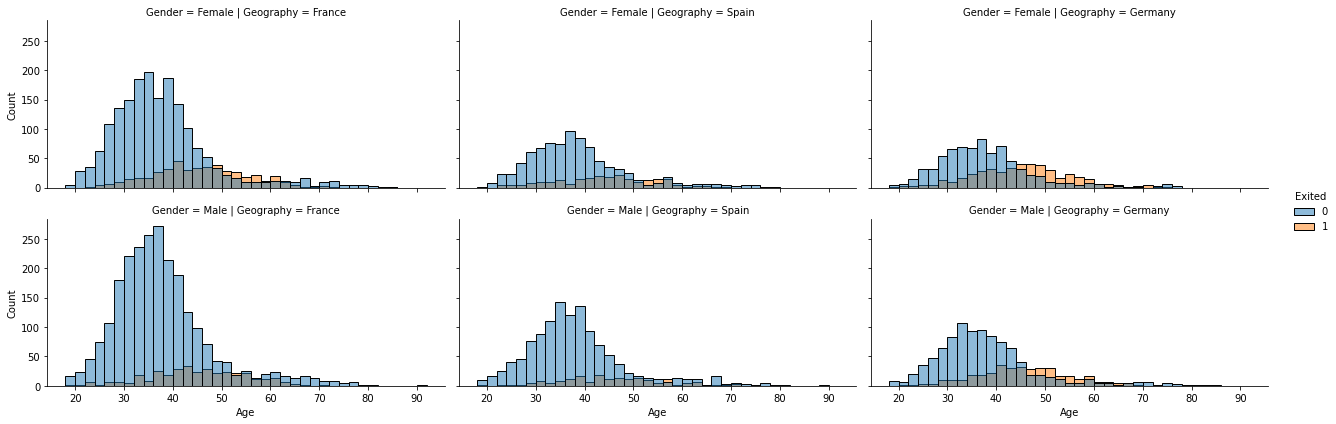

In [9]:
# distribution plot of age
sns.displot(data=clean, x='Age', col='Geography', row='Gender', hue='Exited',
            kind='hist', height=3, aspect=2, bins=37)

Here we can see the clear separation of churn distribution by age. Most non-churning customers are younger than the churning ones. How old is the majority of churning customers?

In [10]:
clean.Age[clean['Exited']==1].describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

Curiously, churning customers come from older segment of the working age (38-51). It's also apparent that the mean age for churning customers is 45 years old. Now how about the non-churning ones?

In [11]:
clean.Age[clean['Exited']==0].describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

We can see that the mean age for non-churning customers is 37 years old, and most of them are in the younger part of the working age (31-41).

### Products used by the customers
Sadly we don't have the exact data on what products the customer use, but we can explore the number of services subscribed by the customer and see their behavior:

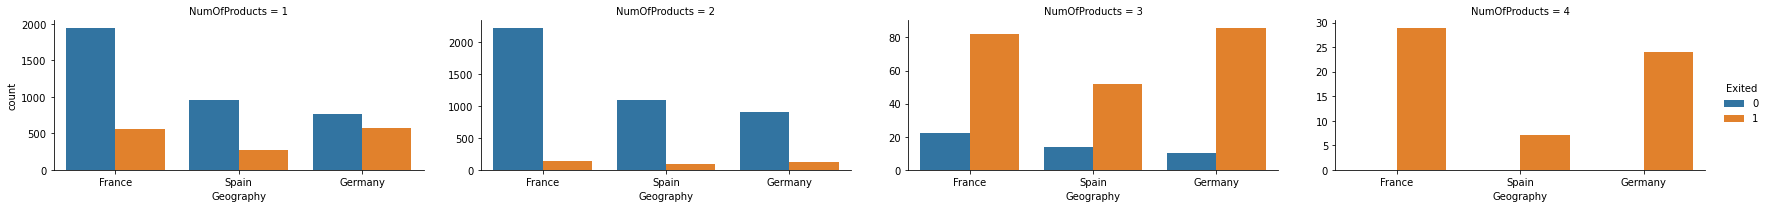

In [12]:
sns.catplot(data=clean, x='Geography', col='NumOfProducts', kind='count', hue='Exited', height=3, aspect=2, sharey=False)

Seeing the graph, the magic number for products used is 2 products. There are less customer churning when using two products compared to just using one product. Another point of interest is the distribution of churn: customers using 3 or four products are churning more. This might imply there is a dissatisfaction when using more than two products, especially when using 4 products. It should be noted though that the y axis scale is not shared for all four graphs.

### Active customers
The next distribution we want to explore is **activity**. Here we will see how customer activity (or inactivity) relate to churn behavior:

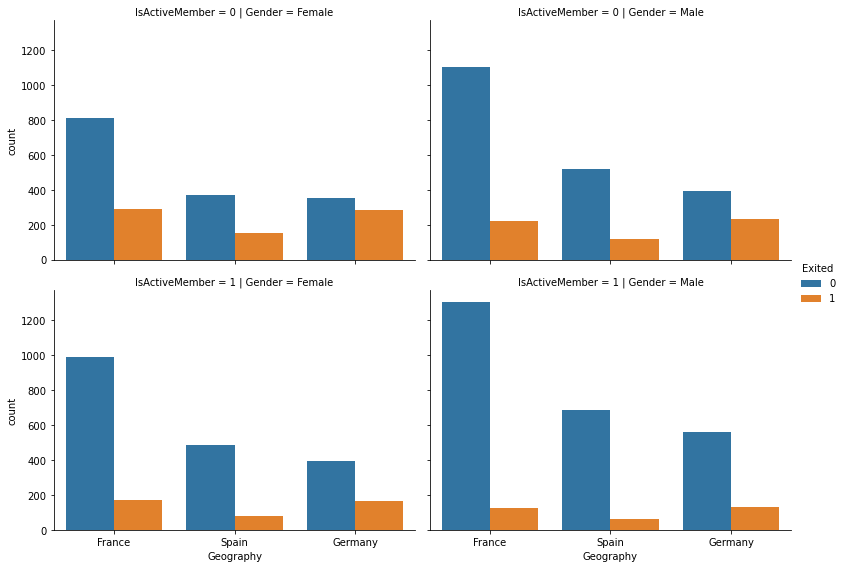

In [13]:
sns.catplot(data=clean, x='Geography', col='Gender', row='IsActiveMember', hue='Exited', kind='count', height=4, aspect=1.4)

From the graph, inactive customers contribute more to the churn count more than active customers. We can also see that inactive female customers make up the most churn compared to other categories.

Next we will see the age distribution of active customers:

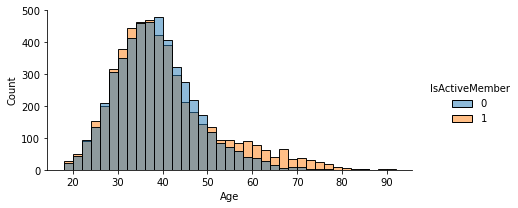

In [14]:
sns.displot(data=clean, x='Age', hue='IsActiveMember', kind='hist', height=3, aspect=2, bins=37)

We see that inactive customers are centering towards older working age. It's also interesting that older customers past their work age are actively using the bank's services.

### Account balance distribution
It's payday (not). we will see how the customers account balance distribution is in each country:

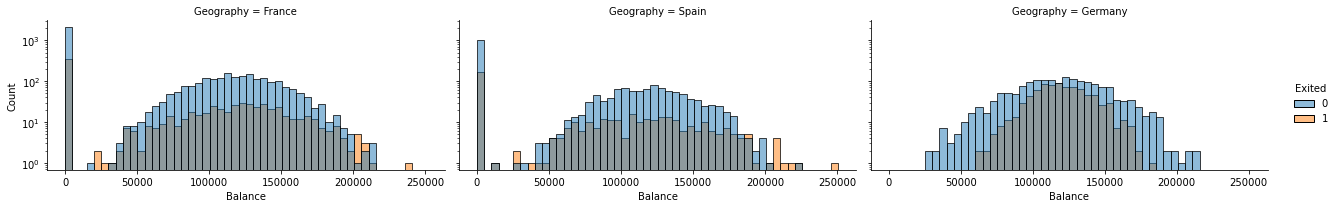

In [15]:
sns.displot(data=clean, x='Balance', col='Geography', hue='Exited', kind='hist', height=3, aspect=2, bins=50, log_scale=[False,True])

From the graph, we can note:
1. Churning customers in Germany have a specific range of balance in their account (60,000 - 185,000)
2. In France and Spain, accounts with the highest balance range churned.
3. Germany has no account with less than 25,000 balance. On the other hand, many of the customers in France and Spain have 0 on their balance.

### Credit of customers
Next we will see the credit score and credit card ownership of the customers:

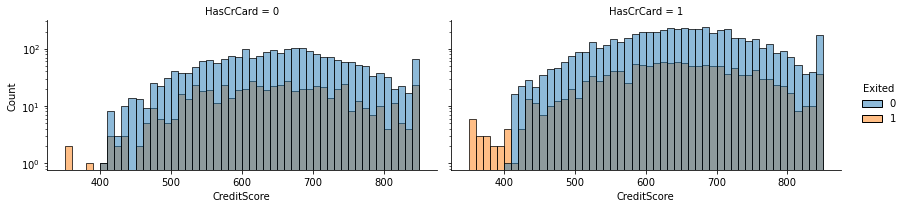

In [16]:
sns.displot(data=clean, x='CreditScore', col='HasCrCard', hue='Exited', height=3, aspect=2, kind='hist', bins=50, log_scale=[False, True])

Customers with credit score lower than 400 are churning. We can see that the distribution of churn is similar irrespective of credit card ownership. The bank can focus on retaining customers with higher credit score, since most of the customers have good scores (584 - 718) and many of the highest credit score (840-850) churned.

## Recommendation
Based on the data exploration, we can give several recommendation for the bank to improve customer retention and reduce churn:
1. Conduct market research in Germany to gain insight of the customers' characteristic and needs. Having information on the market can help the bank to tailor their product to customer's needs.
2. In continuation of number 1, review and/or modify their products to cater to the customers' needs, especially to customers in their 40s which made up most of the customer base.
3. The bank can open new market by doing a marketing campaign for the young adult segment (18-25).
4. Review the product pairings, since using 4 products guarantees churning customers.
5. Focus on retaining customers with high credit score, either by product innovation or giving benefits.